# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.

2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

### 1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.

In [4]:
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [5]:
df.dropna(inplace=True)

In [6]:
df = df.loc[:, "sexo":]

In [7]:
df["log_renda"] = np.log(df["renda"])

In [8]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,8.994711
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,7.524102
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89,7.720413
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77,8.794942
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97,8.775854


- Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.

In [9]:
y, X = patsy.dmatrices("""log_renda ~
                        sexo +
                        posse_de_veiculo +
                        posse_de_imovel +
                        qtd_filhos +
                        tipo_renda +
                        educacao +
                        estado_civil +
                        tipo_residencia +
                        idade +
                        tempo_emprego + 
                        qt_pessoas_residencia
                        """, data=df)

In [10]:
X

DesignMatrix with shape (12427, 25)
  Columns:
    ['Intercept',
     'sexo[T.M]',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'tipo_renda[T.Bolsista]',
     'tipo_renda[T.Empresário]',
     'tipo_renda[T.Pensionista]',
     'tipo_renda[T.Servidor público]',
     'educacao[T.Pós graduação]',
     'educacao[T.Secundário]',
     'educacao[T.Superior completo]',
     'educacao[T.Superior incompleto]',
     'estado_civil[T.Separado]',
     'estado_civil[T.Solteiro]',
     'estado_civil[T.União]',
     'estado_civil[T.Viúvo]',
     'tipo_residencia[T.Casa]',
     'tipo_residencia[T.Com os pais]',
     'tipo_residencia[T.Comunitário]',
     'tipo_residencia[T.Estúdio]',
     'tipo_residencia[T.Governamental]',
     'qtd_filhos',
     'idade',
     'tempo_emprego',
     'qt_pessoas_residencia']
  Terms:
    'Intercept' (column 0)
    'sexo' (column 1)
    'posse_de_veiculo' (column 2)
    'posse_de_imovel' (column 3)
    'tipo_renda' (columns 4:8)
    'educacao' (col

In [11]:
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        01:59:27   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.5847      0.235     28.006      0.000       6.124       7.046
sexo[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
posse_de_veiculo[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
posse_de_imovel[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
tipo_renda[T.Bolsista]               0.2209      0.241      0.916      0.360      -0.252       0.694
tipo_renda[T.Empresário]             0.1551      0.015     10.387      0.000       0.126       0.184
tipo_renda[T.Pensionista]           -0.3087      0.241     -1.280      0.201      -0.782       0.164
tipo_renda[T.Servidor público]       0.0576      0.022      2.591      0.010       0.014       0.101
educacao[T.Pós graduação]            0.1071      0.159      0.673      0.501      -0.205       0.419
educacao[T.Secundário]              -0.0141      0.072     -0.196      0.844      -0.155       0.127
educacao[T.Superior completo]        0.0938      0.072      1.298      0.194      -0.048       0.235
educacao[T.Superior incompleto]     -0.0432      0.078     -0.555      0.579      -0.196       0.109
estado_civil[T.Separado]             0.3265      0.111      2.935      0.003       0.108       0.545
estado_civil[T.Solteiro]             0.2672      0.109      2.453      0.014       0.054       0.481
estado_civil[T.União]               -0.0343      0.025     -1.361      0.174      -0.084       0.015
estado_civil[T.Viúvo]                0.3689      0.116      3.191      0.001       0.142       0.596
tipo_residencia[T.Casa]             -0.0442      0.054     -0.815      0.415      -0.150       0.062
tipo_residencia[T.Com os pais]      -0.0258      0.060     -0.427      0.670      -0.144       0.093
tipo_residencia[T.Comunitário]      -0.1196      0.105     -1.135      0.256      -0.326       0.087
tipo_residencia[T.Estúdio]           0.0665      0.099      0.670      0.503      -0.128       0.261
tipo_residencia[T.Governamental]    -0.0571      0.066     -0.865      0.387      -0.186       0.072
qtd_filhos                          -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego                        0.0617      0.001     59.398      0.000       0.060       0.064
qt_pessoas_residencia                0.2926      0.108      2.716      0.007       0.081       0.504
==============================================================================
Omnibus:                        0.858   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.839
Skew:             

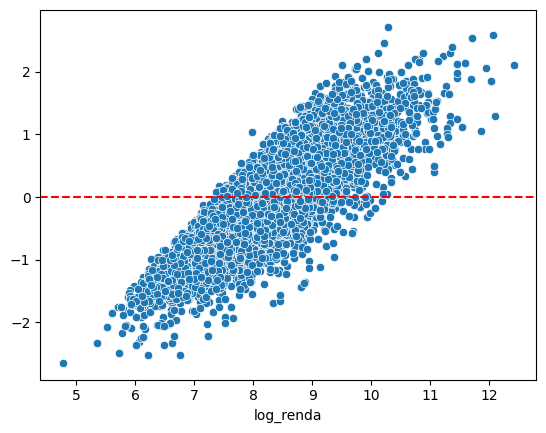

In [12]:
# Gráfico de residuos do modelo inicial
sns.scatterplot(x=df["log_renda"], y=reg.resid)
plt.axhline(y=0, color="r", linestyle="--")

Text(0.5, 1.0, 'Predict x True')

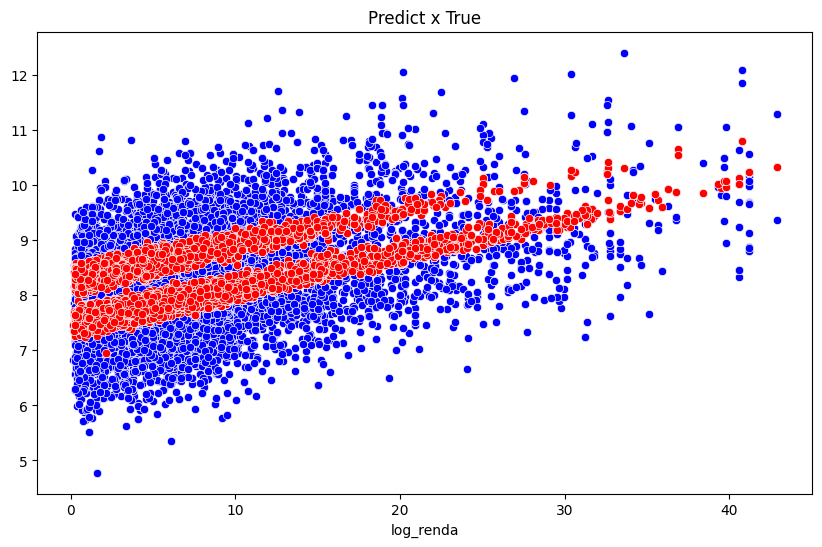

In [13]:
# Gráfico de dispersão dos valores preditos x valores reais

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(ax=ax, x=df["tempo_emprego"], y=y[:, 0], color= "b")
sns.scatterplot(ax=ax, x=df["tempo_emprego"], y=reg.predict(), color="r")
ax.set_ylabel('')
ax.set_xlabel("log_renda")
ax.set_title("Predict x True")


- Mantenha sempre a categoria mais frequente como casela de referência

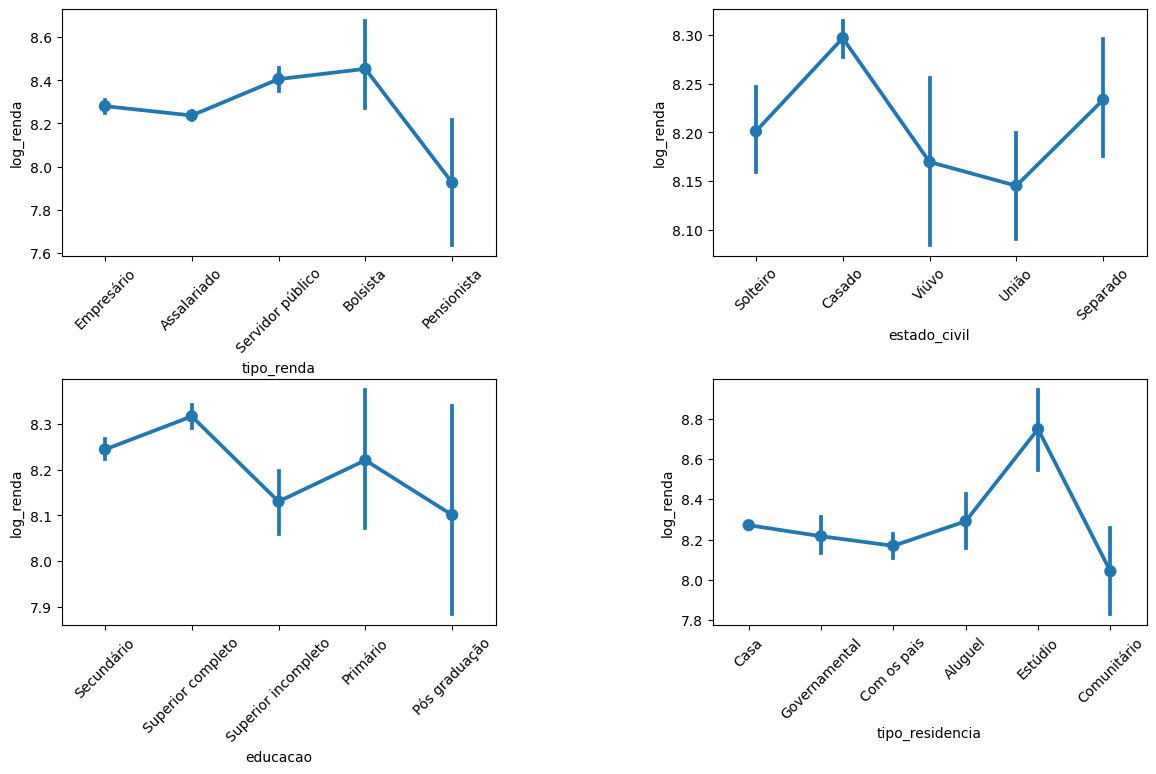

In [14]:
#tipo_renda, estado_civil, educacao, tipo_residencia

fig, axes = plt.subplots(2,2, figsize=(14,8))

for i,f in enumerate([("tipo_renda", axes[0,0]), ("estado_civil", axes[0,1]), ("educacao", axes[1,0]), ("tipo_residencia", axes[1,1])]):
    sns.pointplot(x=f[0], y="log_renda", ax=f[1], data=df)
    f[1].tick_params(axis='x', labelrotation=45)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

Com o gráfico acima, percebemos que: <br>
- Para a variável ``tipo_renda``, temos Pensionista como casela de referência
- Para a variável ``estado_civil``, temos Viúvo como casela de referência
- Para a variável ``educacao``, temos Pós graduação como casela de referência
- Para a variável ``tipo_residencia``, temos Comunitário como casela de referência


In [15]:
y, X = patsy.dmatrices("""log_renda ~
                        sexo +
                        posse_de_veiculo +
                        posse_de_imovel +
                        qtd_filhos +
                        C(tipo_renda, Treatment("Pensionista")) +
                        C(educacao, Treatment("Pós graduação")) +
                        C(estado_civil, Treatment("Viúvo")) +
                        C(tipo_residencia, Treatment("Comunitário")) +
                        idade +
                        tempo_emprego + 
                        qt_pessoas_residencia""", data=df)

In [16]:
X

DesignMatrix with shape (12427, 25)
  Columns:
    ['Intercept',
     'sexo[T.M]',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'C(tipo_renda, Treatment("Pensionista"))[T.Assalariado]',
     'C(tipo_renda, Treatment("Pensionista"))[T.Bolsista]',
     'C(tipo_renda, Treatment("Pensionista"))[T.Empresário]',
     'C(tipo_renda, Treatment("Pensionista"))[T.Servidor público]',
     'C(educacao, Treatment("Pós graduação"))[T.Primário]',
     'C(educacao, Treatment("Pós graduação"))[T.Secundário]',
     'C(educacao, Treatment("Pós graduação"))[T.Superior completo]',
     'C(educacao, Treatment("Pós graduação"))[T.Superior incompleto]',
     'C(estado_civil, Treatment("Viúvo"))[T.Casado]',
     'C(estado_civil, Treatment("Viúvo"))[T.Separado]',
     'C(estado_civil, Treatment("Viúvo"))[T.Solteiro]',
     'C(estado_civil, Treatment("Viúvo"))[T.União]',
     'C(tipo_residencia, Treatment("Comunitário"))[T.Aluguel]',
     'C(tipo_residencia, Treatment("Comunitário"))[T.C

In [17]:
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        01:59:29   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          6.6323      0.318     20.834      0.000       6.008       7.256
sexo[T.M]                                                          0.7874      0.015     53.723      0.000       0.759       0.816
posse_de_veiculo[T.True]                                           0.0441      0.014      3.119      0.002       0.016       0.072
posse_de_imovel[T.True]                                            0.0829      0.014      5.926      0.000       0.055       0.110
C(tipo_renda, Treatment("Pensionista"))[T.Assalariado]             0.3087      0.241      1.280      0.201      -0.164       0.782
C(tipo_renda, Treatment("Pensionista"))[T.Bolsista]                0.5296      0.341      1.553      0.120      -0.139       1.198
C(tipo_renda, Treatment("Pensionista"))[T.Empresário]              0.4639      0.241      1.922      0.055      -0.009       0.937
C(tipo_renda, Treatment("Pensionista"))[T.Servidor público]        0.3663      0.242      1.514      0.130      -0.108       0.841
C(educacao, Treatment("Pós graduação"))[T.Primário]               -0.1071      0.159     -0.673      0.501      -0.419       0.205
C(educacao, Treatment("Pós graduação"))[T.Secundário]             -0.1212      0.142     -0.853      0.394      -0.400       0.157
C(educacao, Treatment("Pós graduação"))[T.Superior completo]      -0.0133      0.142     -0.093      0.926      -0.292       0.265
C(educacao, Treatment("Pós graduação"))[T.Superior incompleto]    -0.1502      0.145     -1.035      0.301      -0.435       0.134
C(estado_civil, Treatment("Viúvo"))[T.Casado]                     -0.3689      0.116     -3.191      0.001      -0.596      -0.142
C(estado_civil, Treatment("Viúvo"))[T.Separado]                   -0.0424      0.048     -0.875      0.382      -0.137       0.053
C(estado_civil, Treatment("Viúvo"))[T.Solteiro]                   -0.1017      0.045     -2.255      0.024      -0.190      -0.013
C(estado_civil, Treatment("Viúvo"))[T.União]                      -0.4032      0.118     -3.425      0.001      -0.634      -0.172
C(tipo_residencia, Treatment("Comunitário"))[T.Aluguel]            0.1196      0.105      1.135      0.256      -0.087       0.326
C(tipo_residencia, Treatment("Comunitário"))[T.Casa]               0.0754      0.091      0.829      0.407      -0.103       0.254
C(tipo_residencia, Treatment("Comunitário"))[T.Com os pais]        0.0938      0.095      0.988      0.323      -0.092       0.280
C(tipo_residencia, Treatment("Comunitário"))[T.Estúdio]            0.1861      0.123      1.508      0.132      -0.056       0.428
C(tipo_residencia, Treatment("Comunitário"))[T.Governamental]      0.0

- Avalie os parâmetros e veja se parecem fazer sentido prático.

Pegando os melhores p-values, temos que;
- Para ``tipo_renda`` como melhor variável explicativa, o que no dia a dia, é bem prático definir a renda de uma pessoa sabendo se ela é empresária ou não;
- Para ``educacao`` nem uma das variável dummies são significantes, levanto em conta que é bem difíficl definir a renda de uma pessoa baseado-se apenas na educação;
- Para ``estado_civil`` temos uma peculiaridade, levando em conta que todo casamento é um tip de união, o p-value é o mesmo para essas dummies.
- Para ``tipo_residencia`` nem uma das variável dummies são significantes, levanto em conta que é bem difíficl definir a renda de uma pessoa baseado-se apenas na sua residencia, levando em conta que hoje em dia, pessoas com uma renda alta preferem pagar aluguel e ter o dinheiro de uma futura casa rendendo em algum tipo de investimento;

### 2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.

In [18]:
# Variáveis menos significantes, educacao e tipo_residencia

y, X = patsy.dmatrices(
                    """log_renda ~
                        sexo +
                        posse_de_veiculo +
                        posse_de_imovel +
                        qtd_filhos +
                        C(tipo_renda, Treatment("Pensionista")) +
                        C(estado_civil, Treatment("Viúvo")) +
                        idade +
                        tempo_emprego + 
                        qt_pessoas_residencia""", data=df
)

In [19]:
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     453.1
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        01:59:29   Log-Likelihood:                -13603.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12411   BIC:                         2.736e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       6.6999      0.270     24.837      0.000       6.171       7.229
sexo[T.M]                                                       0.7819      0.015     53.480      0.000       0.753       0.811
posse_de_veiculo[T.True]                                        0.0535      0.014      3.789      0.000       0.026       0.081
posse_de_imovel[T.True]                                         0.0848      0.014      6.172      0.000       0.058       0.112
C(tipo_renda, Treatment("Pensionista"))[T.Assalariado]          0.2540      0.242      1.051      0.293      -0.220       0.728
C(tipo_renda, Treatment("Pensionista"))[T.Bolsista]             0.5538      0.342      1.621      0.105      -0.116       1.224
C(tipo_renda, Treatment("Pensionista"))[T.Empresário]           0.4195      0.242      1.735      0.083      -0.055       0.894
C(tipo_renda, Treatment("Pensionista"))[T.Servidor público]     0.3309      0.242      1.365      0.172      -0.144       0.806
C(estado_civil, Treatment("Viúvo"))[T.Casado]                  -0.3588      0.116     -3.097      0.002      -0.586      -0.132
C(estado_civil, Treatment("Viúvo"))[T.Separado]                -0.0347      0.049     -0.715      0.474      -0.130       0.060
C(estado_civil, Treatment("Viúvo"))[T.Solteiro]                -0.0965      0.045     -2.139      0.032      -0.185      -0.008
C(estado_civil, Treatment("Viúvo"))[T.União]                   -0.3949      0.118     -3.347      0.001      -0.626      -0.164
qtd_filhos                                                     -0.2560      0.108     -2.366      0.018      -0.468      -0.044
idade                                                           0.0048      0.001      6.147      0.000       0.003       0.006
tempo_emprego                                                   0.0617      0.001     59.407      0.000       0.060       0.064
qt_pessoas_residencia                                           0.2839      0.108      2.629      0.009       0.072       0.496
==============================================================================
Omnibus:                        1.149   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                1.121
Skew:                           0.021   Prob(JB):                        0.571
Kurtosis:                       3.019   Cond. No.                     3.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+03. This might indicate that there a

**Com as retiradas das variáveis o modelo perde um pouco de sua qualidade, tanto o p-value de algumas variáveis que era extremamente relevantes quanto o r-squared, mas nada extremamente significante**

### 3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.

- Nesse ponto irei retirar apenas as dummies categoricas em vez de toda a variável que possui o p-value menor que 5%

#### Matrix com os valores sem alterações

In [20]:
y, X = patsy.dmatrices(
                    """log_renda ~
                        sexo +
                        posse_de_veiculo +
                        posse_de_imovel +
                        qtd_filhos +
                        C(tipo_renda, Treatment("Pensionista")) +
                        C(estado_civil, Treatment("Viúvo")) +
                        idade +
                        tempo_emprego + 
                        qt_pessoas_residencia""", data=df
                   
)
X

DesignMatrix with shape (12427, 16)
  Columns:
    ['Intercept',
     'sexo[T.M]',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'C(tipo_renda, Treatment("Pensionista"))[T.Assalariado]',
     'C(tipo_renda, Treatment("Pensionista"))[T.Bolsista]',
     'C(tipo_renda, Treatment("Pensionista"))[T.Empresário]',
     'C(tipo_renda, Treatment("Pensionista"))[T.Servidor público]',
     'C(estado_civil, Treatment("Viúvo"))[T.Casado]',
     'C(estado_civil, Treatment("Viúvo"))[T.Separado]',
     'C(estado_civil, Treatment("Viúvo"))[T.Solteiro]',
     'C(estado_civil, Treatment("Viúvo"))[T.União]',
     'qtd_filhos',
     'idade',
     'tempo_emprego',
     'qt_pessoas_residencia']
  Terms:
    'Intercept' (column 0)
    'sexo' (column 1)
    'posse_de_veiculo' (column 2)
    'posse_de_imovel' (column 3)
    'C(tipo_renda, Treatment("Pensionista"))' (columns 4:8)
    'C(estado_civil, Treatment("Viúvo"))' (columns 8:12)
    'qtd_filhos' (column 12)
    'idade' (column 13)


In [21]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     453.1
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        01:59:29   Log-Likelihood:                -13603.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12411   BIC:                         2.736e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       6.6999      0.270     24.837      0.000       6.171       7.229
sexo[T.M]                                                       0.7819      0.015     53.480      0.000       0.753       0.811
posse_de_veiculo[T.True]                                        0.0535      0.014      3.789      0.000       0.026       0.081
posse_de_imovel[T.True]                                         0.0848      0.014      6.172      0.000       0.058       0.112
C(tipo_renda, Treatment("Pensionista"))[T.Assalariado]          0.2540      0.242      1.051      0.293      -0.220       0.728
C(tipo_renda, Treatment("Pensionista"))[T.Bolsista]             0.5538      0.342      1.621      0.105      -0.116       1.224
C(tipo_renda, Treatment("Pensionista"))[T.Empresário]           0.4195      0.242      1.735      0.083      -0.055       0.894
C(tipo_renda, Treatment("Pensionista"))[T.Servidor público]     0.3309      0.242      1.365      0.172      -0.144       0.806
C(estado_civil, Treatment("Viúvo"))[T.Casado]                  -0.3588      0.116     -3.097      0.002      -0.586      -0.132
C(estado_civil, Treatment("Viúvo"))[T.Separado]                -0.0347      0.049     -0.715      0.474      -0.130       0.060
C(estado_civil, Treatment("Viúvo"))[T.Solteiro]                -0.0965      0.045     -2.139      0.032      -0.185      -0.008
C(estado_civil, Treatment("Viúvo"))[T.União]                   -0.3949      0.118     -3.347      0.001      -0.626      -0.164
qtd_filhos                                                     -0.2560      0.108     -2.366      0.018      -0.468      -0.044
idade                                                           0.0048      0.001      6.147      0.000       0.003       0.006
tempo_emprego                                                   0.0617      0.001     59.407      0.000       0.060       0.064
qt_pessoas_residencia                                           0.2839      0.108      2.629      0.009       0.072       0.496
==============================================================================
Omnibus:                        1.149   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                1.121
Skew:                           0.021   Prob(JB):                        0.571
Kurtosis:                       3.019   Cond. No.                     3.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+03. This might indicate that there a

In [22]:
df["estado_civil"].loc[df["estado_civil"] != "União"] = 0

C:\Users\carlo\AppData\Local\Temp\ipykernel_25672\335111788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["estado_civil"].loc[df["estado_civil"] != "União"] = 0


In [23]:
df["estado_civil"].value_counts()

estado_civil
0        11503
União      924
Name: count, dtype: int64

#### Matrix somente com as variáveis mais relevantes para o modelo, mas também não conseguimos melhorar a qualidade dele


In [24]:
y, X = patsy.dmatrices(
                    """log_renda ~
                        sexo +
                        posse_de_veiculo +
                        posse_de_imovel +
                        qtd_filhos +
                        estado_civil +
                        idade +
                        tempo_emprego + 
                        qt_pessoas_residencia""", data=df
                   
)
X

DesignMatrix with shape (12427, 9)
  Columns:
    ['Intercept',
     'sexo[T.M]',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'estado_civil[T.União]',
     'qtd_filhos',
     'idade',
     'tempo_emprego',
     'qt_pessoas_residencia']
  Terms:
    'Intercept' (column 0)
    'sexo' (column 1)
    'posse_de_veiculo' (column 2)
    'posse_de_imovel' (column 3)
    'estado_civil' (column 4)
    'qtd_filhos' (column 5)
    'idade' (column 6)
    'tempo_emprego' (column 7)
    'qt_pessoas_residencia' (column 8)
  (to view full data, use np.asarray(this_obj))

In [25]:
reg = sm.OLS(y, X).fit()

In [26]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     823.4
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        01:59:29   Log-Likelihood:                -13672.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12418   BIC:                         2.743e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.2383      0.043    166.880      0.000       7.153       7.323
sexo[T.M]                    0.7687      0.015     52.586      0.000       0.740       0.797
posse_de_veiculo[T.True]     0.0557      0.014      3.931      0.000       0.028       0.084
posse_de_imovel[T.True]      0.0863      0.014      6.252      0.000       0.059       0.113
estado_civil[T.União]       -0.0295      0.025     -1.164      0.244      -0.079       0.020
qtd_filhos                   0.0303      0.020      1.539      0.124      -0.008       0.069
idade                        0.0049      0.001      6.303      0.000       0.003       0.006
tempo_emprego                0.0610      0.001     59.079      0.000       0.059       0.063
qt_pessoas_residencia       -0.0062      0.016     -0.373      0.709      -0.038       0.026
==============================================================================
Omnibus:                        1.219   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                1.192
Skew:                           0.022   Prob(JB):                        0.551
Kurtosis:                       3.019   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusão

**No melhor dos casos, não tivemos alteração no r-squared do modelo inicial para o modelo final**

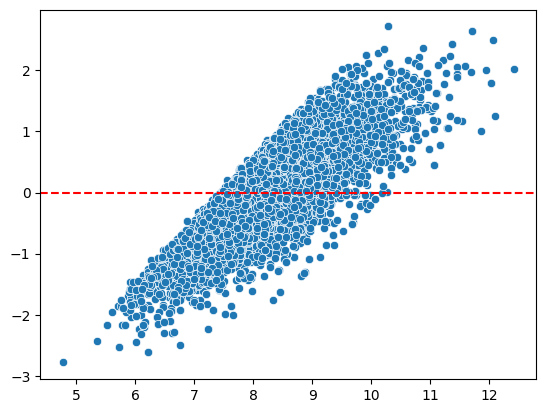

In [29]:
sns.scatterplot(x=y[:, 0], y=reg.resid)
plt.axhline(y=0, color="r", linestyle="--")

Text(0.5, 1.0, 'Predict x True')

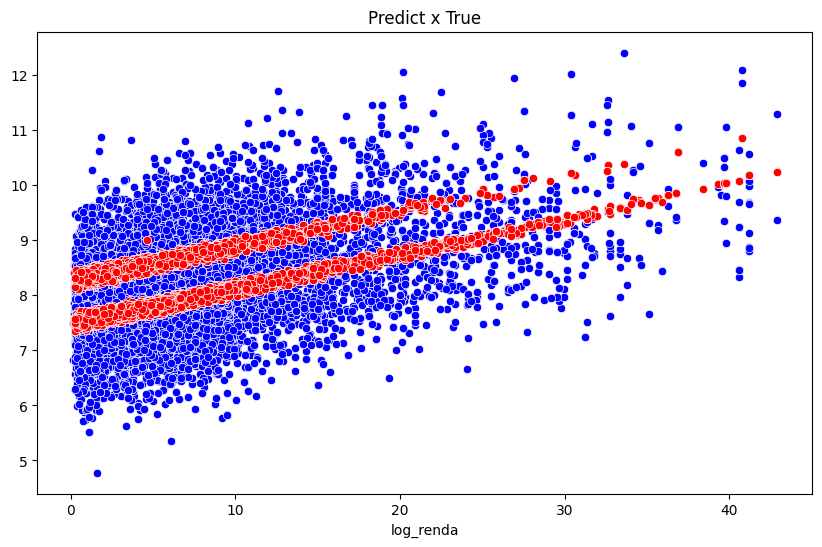

In [28]:
# Gráfico de dispersão dos valores preditos x valores reais de acordo com o tempo de emprego

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(ax=ax, x=df["tempo_emprego"], y=y[:, 0], color= "b")
sns.scatterplot(ax=ax, x=df["tempo_emprego"], y=reg.predict(), color="r")
ax.set_ylabel('')
ax.set_xlabel("log_renda")
ax.set_title("Predict x True")
